In [1]:
# Datos: http://saludata.saludcapital.gov.co/osb/datos_abiertos_osb/enf-transmisibles/OSB_EnfTransm-COVID-19.csv

In [2]:
import requests
import pandas as pd
import geopandas as gpd

In [3]:
URL = 'http://saludata.saludcapital.gov.co/osb/datos_abiertos_osb/enf-transmisibles/OSB_EnfTransm-COVID-19.csv'
FILEPATH = './data/covid19_bogota_raw.csv'

In [29]:
r = requests.get( URL, stream = True )

with open( FILEPATH, 'wb' ) as f:
    f.write( r.content )

In [30]:
# Loading the data
covid_bog = pd.read_csv( FILEPATH, encoding = 'ISO-8859-1', sep = ';', skiprows = 4, skipfooter = 2 )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [31]:
covid_bog.columns

Index(['ID de caso', 'Fecha de diagnóstico', 'Ciudad de residencia',
       'Localidad de residencia', 'Edad', 'Sexo', 'Tipo de caso', 'Ubicación',
       'Estado'],
      dtype='object')

In [32]:
covid_bog.shape

(55056, 9)

In [33]:
covid_bog[ 'Fecha de diagnóstico' ] = pd.to_datetime( covid_bog[ 'Fecha de diagnóstico' ], format = '%d/%m/%Y' )

In [34]:
covid_bog[ 'Localidad de residencia' ].replace( { 'Santa Fe': 'Santa Fé' }, inplace = True )

In [35]:
covid_bog[ 'Atencion' ] = covid_bog[ 'Ubicación' ].str.strip()
del covid_bog[ 'Ubicación' ]

In [36]:
covid_bog[ 'Estado' ] = covid_bog[ 'Estado' ].str.strip()

In [37]:
covid_bog.dtypes

ID de caso                          int64
Fecha de diagnóstico       datetime64[ns]
Ciudad de residencia               object
Localidad de residencia            object
Edad                                int64
Sexo                               object
Tipo de caso                       object
Estado                             object
Atencion                           object
dtype: object

In [38]:
def get_age_group( x ):
    if x <= 19:
        return '0 - 19'
    elif x > 19 and x <= 39:
        return '20 - 39'
    elif x > 39 and x <= 59:
        return '40 - 59'
    elif x > 59 and x <= 79:
        return '60 - 79'
    elif x > 79:
          return '80+'
    else:
        return None

covid_bog[ 'Grupo de edad' ] = covid_bog[ 'Edad' ].apply( get_age_group )

In [47]:
covid_bog.replace( { 'Fallecido (No aplica, No causa Directa)': 'Fallecido', 'Fallecido(No aplica': 'Fallecido', 'fallecido': 'Fallecido', 'hospital': 'Hospital', 'leve': 'Leve' }, inplace = True )

In [40]:
covid_bog.rename( columns = { 'ID de caso': 'ID_caso', 'Fecha de diagnóstico': 'Fecha_diagnostico', 'Ciudad de residencia': 'Ciudad', 'Localidad de residencia': 'Localidad', 'Tipo de caso': 'Tipo', 'Ubicación': 'Atencion', 'Grupo de edad': 'Grupo_de_edad' }, inplace = True )

In [48]:
covid_bog.dtypes

ID_caso                       int64
Fecha_diagnostico    datetime64[ns]
Ciudad                       object
Localidad                    object
Edad                          int64
Sexo                         object
Tipo                         object
Estado                       object
Atencion                     object
Grupo_de_edad                object
dtype: object

In [49]:
covid_bog.tail()

,ID_caso,Fecha_diagnostico,Ciudad,Localidad,Edad,Sexo,Tipo,Estado,Atencion,Grupo_de_edad
55051,55052,2020-07-15,Sin Dato,Sin Dato,86,M,En estudio,Leve,Casa,80+
55052,55053,2020-07-15,Sin Dato,Sin Dato,88,M,En estudio,Leve,Casa,80+
55053,55054,2020-04-08,Bogotá,Barrios Unidos,61,M,En estudio,Fallecido,Fallecido,60 - 79
55054,55055,2020-07-15,Sin Dato,Sin Dato,91,F,En estudio,Leve,Casa,80+
55055,55056,2020-07-15,Sin Dato,Sin Dato,18,F,En estudio,Leve,Casa,0 - 19


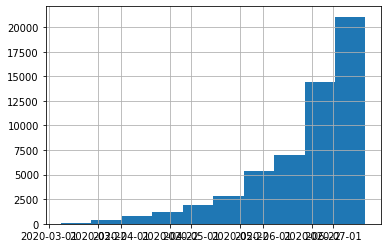

In [50]:
covid_bog[ 'Fecha_diagnostico' ].hist()

In [51]:
covid_bog[ 'Atencion' ].unique()

array(['Casa', 'Fallecido', 'Hospital', 'Hospital UCI'], dtype=object)

In [52]:
covid_bog[ 'Estado' ].unique()

array(['Recuperado', 'Fallecido', 'Leve', 'Moderado', 'Grave'],
      dtype=object)

In [53]:
covid_bog.to_csv( './data/covid19_bogota.csv', index = False )